# 演習2の解答例


In [1]:
# Qiskitライブラリーを導入
from qiskit import *

# 描画のためのライブラリーを導入
import matplotlib.pyplot as plt
%matplotlib inline

# 数値計算モジュールを導入
import numpy as np

In [2]:
# Qiskitバージョンの確認
qiskit.__qiskit_version__

{'qiskit-terra': '0.13.0',
 'qiskit-aer': '0.5.1',
 'qiskit-ignis': '0.3.0',
 'qiskit-ibmq-provider': '0.7.0',
 'qiskit-aqua': None,
 'qiskit': '0.19.1'}

## 演習2-(1)の解答例

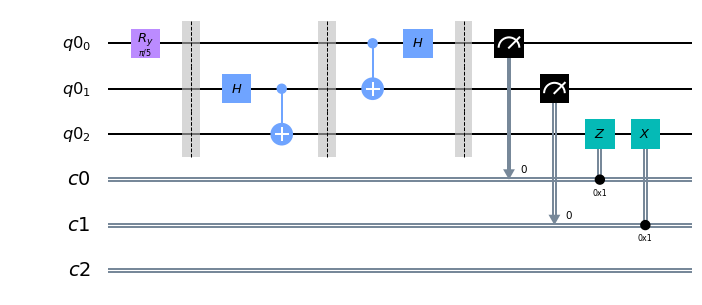

In [3]:
# 3量子ビット回路を用意
qr = QuantumRegister(3)    
a_0 = ClassicalRegister(1)
a_1 = ClassicalRegister(1)
b_0 = ClassicalRegister(1)

qc = QuantumCircuit(qr,a_0,a_1,b_0)    

# Aliceのもつ未知の量子状態ψを今回はRyで作ります。角度はπ/5にしました。
qc.ry(np.pi/5,0)
qc.barrier()    #回路を見やすくするために入れます

# EveがEPRペアを作ってq1をAliceにq2をBobに渡します
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせ測定します。
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, a_0)
qc.measure(1, a_1)

#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
qc.z(2).c_if(a_0, 1)
qc.x(2).c_if(a_1, 1)

# 回路を描画
qc.draw(output="mpl")

## 演習2-(2)の解答例

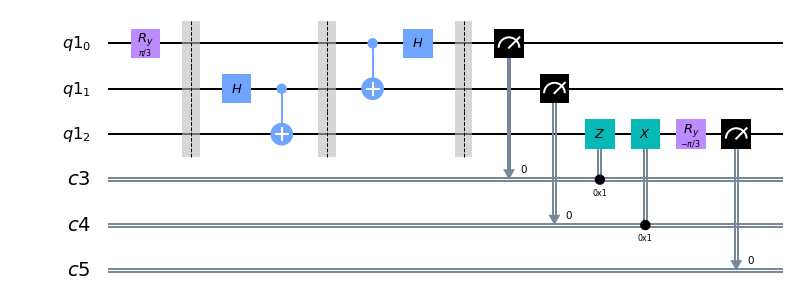

In [4]:
# 3量子ビット回路を用意
qr = QuantumRegister(3)    
a_0 = ClassicalRegister(1)
a_1 = ClassicalRegister(1)
b_0 = ClassicalRegister(1)

qc = QuantumCircuit(qr,a_0,a_1,b_0)    

# Aliceのもつ未知の量子状態ψを今回はRyで作ります。角度はπ/3にしました。
qc.ry(np.pi/3,0)
qc.barrier()    #回路を見やすくするために入れます

# EveがEPRペアを作ってq1をAliceにq2をBobに渡します
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせ測定します。
qc.cx(0, 1)
qc.h(0)
qc.barrier()
qc.measure(0, a_0)
qc.measure(1, a_1)

#Aliceが測定結果をBobに送り、Bobが結果に合わせて操作します
qc.z(2).c_if(a_0, 1)
qc.x(2).c_if(a_1, 1)

# 未知の量子状態ψの逆ゲートをかけて０が測定できるか確かめます
qc.ry(-np.pi/3, 2)    
qc.measure(2, b_0)

qc.draw(output="mpl")

{'0 0 0': 244, '0 0 1': 241, '0 1 0': 266, '0 1 1': 273}


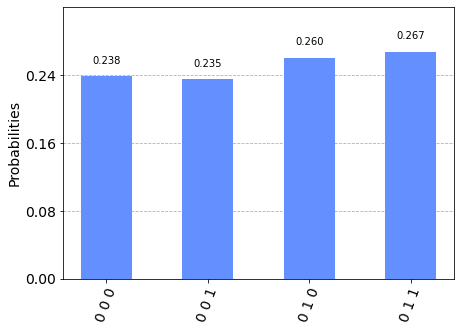

In [5]:
# qasm_simulatorで実行して確認してみましょう

from qiskit import BasicAer as Aer
from qiskit import execute

backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend).result().get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

qiskitのビット配列は右端が0なので、bobのビットは左端です。0になっていることが確認できましたか？

## 実機での実験

実際の量子コンピューターでの実験コードを載せておきます。<br>
IBMの量子コンピューターは測定後の操作継続ができないので、少しコードを変えます。

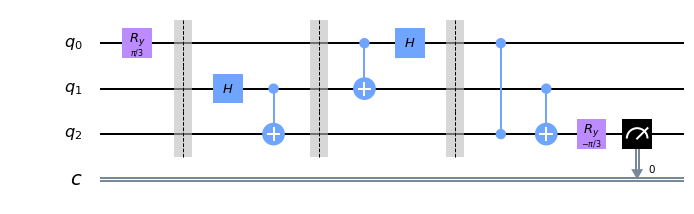

In [6]:
# 3量子ビット、1古典ビットの回路を用意
qc = QuantumCircuit(3,1)    

# Aliceのもつ未知の量子状態ψをRyで作ります。角度はπ/3にしました。
qc.ry(np.pi/3,0)
qc.barrier()    #回路を見やすくするために入れます

# EveがEPRペアを作ってq1をAliceにq2をBobに渡します
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# AliceがCNOTとHでψと自分のEPRペアをエンタングルさせます。
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Aliceの状態に合わせてBobが操作します（ここを変えています！）
qc.cz(0,2)
qc.cx(1,2)

# 未知の量子状態ψの逆ゲートをかけて０が測定できるか確かめます
qc.ry(-np.pi/3, 2)    
qc.measure(2, 0)

qc.draw(output="mpl")

{'0': 1024}


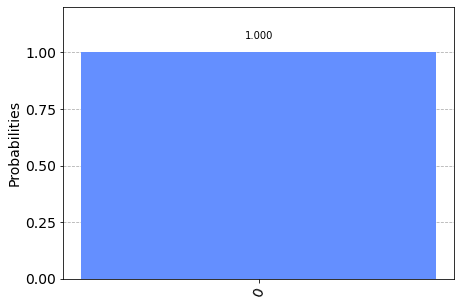

In [7]:
# 先にシミュレーターでコードが合っているか確認します
backend = BasicAer.get_backend('qasm_simulator')
counts = execute(qc, backend).result().get_counts()
print(counts)
plot_histogram(counts)

ここで、初めて実デバイスで実行する人は[こちら](https://qiskit.org/documentation/install.html#access-ibm-quantum-systems)を参考に、ご自分のAPIトークンをコピーして下のセルを実行してロードしてください。

In [ ]:
# 初めて実デバイスで実行する人はこちらを実行
from qiskit import IBMQ
IBMQ.save_account('MY_API_TOKEN')    # ご自分のトークンを入れてください

トークンをロードできたら、以下を続けます。

In [8]:
# アカウント情報をロードして、使える量子デバイスを確認します
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [9]:
# 最もすいているバックエンドを選びます
from qiskit.providers.ibmq import least_busy
large_enough_devices = IBMQ.get_provider().backends(filters=lambda x: x.configuration().n_qubits > 3 and not x.configuration().simulator) 
print(large_enough_devices)
real_backend = least_busy(large_enough_devices)   

print("ベストなバックエンドは " + real_backend.name())

[<IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_rome') from IBMQ(hub='ibm-q', group='open', project='main')>]
ベストなバックエンドは ibmq_ourense


In [10]:
# 上記のバックエンドで実行します
job = execute(qc,real_backend)

In [11]:
# ジョブの実行状態を確認します
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


{'0': 899, '1': 125}


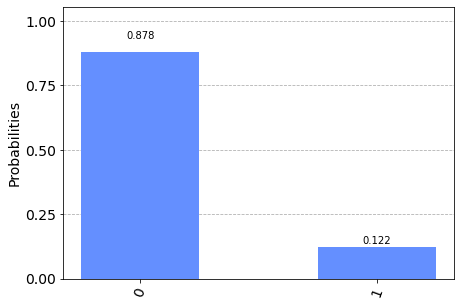

In [12]:
# 結果を確認します
real_result= job.result()
print(real_result.get_counts(qc))
plot_histogram(real_result.get_counts(qc))

シミュレーションの結果とは異なり、0以外の結果も出力されています。これは、実機で発生したノイズによるものです。 ノイズの発生自体は、古典コンピューター上でも発生していますが、内部的にそれを補正する仕組みが実装されているため、我々ユーザーがノイズを気にすることがないレベルまで進歩しています。量子コンピューターでもノイズは発生するのですが、それを除去する仕組みを実装することはハードウェアの性能上、現状では困難とされています。
そこで、ノイズが発生することを許容する中規模の量子コンピューターデバイスの開発とそこで適用可能なアルゴリズムが実用に最も近いとされています。